<br> <center> <font size="6" color=Black>AI Fairness Model Using IBM AIF356 Toolkit</font> </center> <br/>

<br> <font size="6" color=Black>Dataset Cleaning</font> <br/>

In [77]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
from sklearn.preprocessing import StandardScaler
from aif360.metrics import BinaryLabelDatasetMetric
from sklearn.linear_model import LogisticRegression
from aif360.algorithms.preprocessing import Reweighing

<br> <font size="6" color=Black>Reading the Dataset</font> <br/>

In [78]:
data_set = pd.read_csv('diabetic_data.csv')

<br> <font size="6" color=Black>Extracting Column Names</font> <br/>

In [79]:
data_set.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

<br> <font size="6" color=Black>Extracting Data from Dataframe</font> <br/>

In [80]:
data_set.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<br> <font size="6" color=Black>Steps that I have followed to clean the dataset</font> <br/>
- <p>  Checking the Null values in the dataset </p>
<br/>
- <p> Renaming the Columns </p>
<br/>
- <p> Cleaning the columns and removing the speical symbols  </p>
<br/>
- <p> Changing the datatypes of the columns  </p>
<br/>
- <p> Replacing the less clear imformation by clear information </p>
<br/>
- <p> Checking the Null values again </p>
<br/>
- <p> Writing the clean dataset file  </p>
<br/>

<br> <font size="6" color=Black>Checking null value in any column of Dataframe</font> <br/>

In [81]:
data_set.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

<br> <font size="6" color=Black>Renaming the Column Names</font> <br/>

In [82]:
data_set = data_set.rename(columns={'metformin-pioglitazone': 'metformin_pioglitazone'})
data_set = data_set.rename(columns={'glyburide-metformin': 'glyburide_metformin'})
data_set = data_set.rename(columns={'glimepiride-pioglitazone': 'glimepiride_pioglitazone'})
data_set = data_set.rename(columns={'metformin-rosiglitazone': 'metformin_rosiglitazone'})
data_set = data_set.rename(columns={'glipizide-metformin': 'glipizide_metformin'})

<br> <font size="6" color=Black> Cleaning the column "race"</font> <br/>

<br> <font size="5" color=Black>Printing the column "race" before Cleaning</font> <br/>

In [83]:
data_set['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

<br> <font size="5" color=Black>Cleaning Process of column "race"</font> <br/>

In [84]:
data_set['race'] = data_set['race'].replace(['?'], 'Not Available')
data_set['race'] = data_set['race'].replace(['AfricanAmerican'], 'African American')

<br> <font size="5" color=Black>Printing the column "race" after Cleaning</font> <br/>

In [85]:
data_set['race'].unique()

array(['Caucasian', 'African American', 'Not Available', 'Other', 'Asian',
       'Hispanic'], dtype=object)

<br> <font size="6" color=Black> Cleaning the column "age"</font> <br/>
<br/>
<p> Age column is contaning the ranges of age, like from 10 to 20. So, I have extract the maximum range from each cell and turncate the minimum age. Then I have rename the column name from "age" to "maximum_age" </p>
<br/>


<br> <font size="5" color=Black> Unique values of column "age" before cleaning</font> <br/>

In [86]:
# Printing the unique values of the "age" column before cleaning
data_set.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

<br> <font size="5" color=Black> Cleaning Operation on column "age"</font> <br/>

In [87]:
#----------------------------------------------------------------------
# Turncating the 1st 3 values from each cell, to remove the minimum age limit
#----------------------------------------------------------------------
data_set.age = data_set.age.astype(str).str[3:]
#----------------------------------------------------------------------
# Removing the "-" symbol from each cell
#----------------------------------------------------------------------
data_set['age'] = data_set['age'].map(lambda x: re.sub(r'\W+', '', x))
#----------------------------------------------------------------------
# Changing the data type to the "int"
#----------------------------------------------------------------------
data_set['age'] = data_set['age'].astype(int)
#----------------------------------------------------------------------
# Renaming the column from "age" to "maximum_age"
#----------------------------------------------------------------------
data_set = data_set.rename(columns={'age': 'maximum_age'})

<br> <font size="5" color=Black>Unique values of column "maximum_age" after cleaning</font> <br/>

In [88]:
# Printing the unique values of the "maximum_age" column after cleaning
data_set.maximum_age.unique()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100], dtype=int64)

<br> <font size="6" color=Black> Cleaning the column "weight"</font> <br/>
<br/>
<p> Weight column is contaning the ranges of weight, like from 150 to 175. So, I have extract the maximum weight from each cell and turncate the minimum weight. Then I have rename the column name from "weight" to "maximum_weight" </p>

<br> <font size="5" color=Black> Unique values of column "weight" before cleaning</font> <br/>

In [89]:
# Printing the unique values of the "weight" column before cleaning
data_set.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

<br> <font size="5" color=Black> Cleaning Operation on column "weight"</font> <br/>

In [90]:
#----------------------------------------------------------------------
# Turncating the 1st 4 values from each cell, to remove the minimum weight limit
#----------------------------------------------------------------------
data_set.weight = data_set.weight.astype(str).str[-4:]
#----------------------------------------------------------------------
# Removing the "-" symbol from each cell
#----------------------------------------------------------------------
data_set['weight'] = data_set['weight'].map(lambda x: re.sub(r'\W+', '', x))
#----------------------------------------------------------------------
# Renaming the column from "weight" to "maximum_weight"
#----------------------------------------------------------------------
data_set = data_set.rename(columns={'weight': 'maximum_weight'})

<br> <font size="5" color=Black> Unique values of column "maximum_weight" after cleaning</font> <br/>

In [91]:
# Printing the unique values of the "maximum_weight" column after cleaning
data_set.maximum_weight.unique()

array(['', '100', '75', '25', '125', '50', '150', '200', '175'],
      dtype=object)

<p> There were "?" in the column "weight" ,After Cleaning, Now it is containing null value, so I am replacing them with "Not Available" </p>
<br/>

In [92]:
data_set['maximum_weight'] = data_set['maximum_weight'].replace([''], 'Not Available')

<br> <font size="5" color=Black> Unique values of column "maximum_weight" after cleaning</font> <br/>

In [93]:
# Printing the unique values of the "maximum_weight" column after cleaning
data_set.maximum_weight.unique()

array(['Not Available', '100', '75', '25', '125', '50', '150', '200',
       '175'], dtype=object)

<br> <font size="6" color=Black> Cleaning the column "medical_specialty"</font> <br/>
<br/>
<p> There are many special symbols/characters in the column "medical_specialty", so I have removed them </p>
<br/>

<br> <font size="5" color=Black> Cleaning of column "medical_specialty"</font> <br/>

In [94]:
data_set['medical_specialty'] = data_set['medical_specialty'].map(lambda x: re.sub(r'\W+', ' ', x))
data_set['medical_specialty'] = data_set['medical_specialty'].replace([' '], 'Not Available')

<br> <font size="6" color=Black> Cleaning the column "diag_2" and "diag_3"</font> <br/>
<br/>
<p>  There are "?" in the columns "diag_2" and "diag_3", so I am replacing them with "Not Available" </p>
<br/>

<br> <font size="5" color=Black>Cleaning the columns "diag_2" and "diag_3"</font> <br/>

In [95]:
data_set['diag_2'] = data_set['diag_2'].replace(['?'], 'Not Available')
data_set['diag_3'] = data_set['diag_3'].replace(['?'], 'Not Available')

<br> <font size="6" color=Black> Cleaning the column "max_glu_serum"</font> <br/>
<br/>
<p>  Replacing the ">300" by "more than 300" and ">200" by "more than 200" and "Norm" by "Normal" </p>
<br/>

<br> <font size="5" color=Black> Printing the column "max_glu_serum" before Cleaning</font> <br/>

In [96]:
data_set["max_glu_serum"].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

<br> <font size="5" color=Black> Cleaning the column "max_glu_serum"</font> <br/>

In [97]:
data_set['max_glu_serum'] = data_set['max_glu_serum'].replace(['>300'], 'more than 300')
data_set['max_glu_serum'] = data_set['max_glu_serum'].replace(['>200'], 'more than 200')
data_set['max_glu_serum'] = data_set['max_glu_serum'].replace(['Norm'], 'Normal')

<br> <font size="5" color=Black> Printing the column "max_glu_serum" after Cleaning</font> <br/>

In [98]:
data_set["max_glu_serum"].unique()

array(['None', 'more than 300', 'Normal', 'more than 200'], dtype=object)

<br> <font size="6" color=Black> Cleaning the column "A1Cresult"</font> <br/>
<br/>
<p> Replacing the ">7" by "more than 7" and ">8" by "more than 8" and "Norm" by "Normal" </p>
<br/>

<br> <font size="5" color=Black> Printing the column "A1Cresult" before Cleaning</font> <br/>

In [99]:
data_set['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

<br> <font size="5" color=Black> Cleaning the column "A1Cresult"</font> <br/>

In [100]:
data_set['A1Cresult'] = data_set['A1Cresult'].replace(['>7'], 'more than 7')
data_set['A1Cresult'] = data_set['A1Cresult'].replace(['>8'], 'more than 8')
data_set['A1Cresult'] = data_set['A1Cresult'].replace(['Norm'], 'Normal')

<br> <font size="5" color=Black> Printing the column "A1Cresult" after Cleaning</font> <br/>

In [101]:
data_set['A1Cresult'].unique()

array(['None', 'more than 7', 'more than 8', 'Normal'], dtype=object)

<br> <font size="6" color=Black> Cleaning the column "change"</font> <br/>
<br/>
<p> Replacing the "ch" by "Yes" </p>
<br/>

<br> <font size="5" color=Black> Printing the column "change" before Cleaning</font> <br/>

In [102]:
data_set['change'].unique()

array(['No', 'Ch'], dtype=object)

<br> <font size="5" color=Black> Cleaning the column "change"</font> <br/>

In [103]:
data_set['change'] = data_set['change'].replace(['Ch'], 'Yes')

<br> <font size="5" color=Black> Printing the column "change" after Cleaning</font> <br/>

In [104]:
data_set['change'].unique()

array(['No', 'Yes'], dtype=object)

<br> <font size="6" color=Black> Cleaning the column "readmitted"</font> <br/>
<br/>
<p> Replacing the ">30" by "more than 30" and "<30" by "less than 30" </p>
<br/>

<br> <font size="5" color=Black> Printing the column "readmitted" before Cleaning</font> <br/>

In [105]:
data_set['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

<br> <font size="5" color=Black> Cleaning the column "readmitted"</font> <br/>

In [106]:
data_set['readmitted'] = data_set['readmitted'].replace(['>30'], 'more than 30')
data_set['readmitted'] = data_set['readmitted'].replace(['<30'], 'less than 30')

<br> <font size="5" color=Black> Printing the column "readmitted" after Cleaning</font> <br/>

In [107]:
data_set['readmitted'].unique()

array(['NO', 'more than 30', 'less than 30'], dtype=object)

<br> <font size="6" color=Black>Checking null values of Dataframe after Complete Cleaning</font> <br/>

In [108]:
data_set.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
maximum_age                 0
maximum_weight              0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

<br> <font size="6" color=Black>Extracting Data from Dataframe after Cleaning</font> <br/>

In [109]:
data_set.head(5)

,encounter_id,patient_nbr,race,gender,maximum_age,maximum_weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,10,Not Available,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,20,Not Available,1,1,7,3,...,No,Up,No,No,No,No,No,Yes,Yes,more than 30
2,64410,86047875,African American,Female,30,Not Available,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,40,Not Available,1,1,7,2,...,No,Up,No,No,No,No,No,Yes,Yes,NO
4,16680,42519267,Caucasian,Male,50,Not Available,1,1,7,1,...,No,Steady,No,No,No,No,No,Yes,Yes,NO


<br> <font size="6" color=Black>Writing the Cleaned ".csv" file</font> <br/>

In [110]:
file_name = "cleaned_file.csv"
data_set.to_csv(file_name, sep=',', index=False)

In [111]:
data_set.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'maximum_age',
       'maximum_weight', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [112]:
data_set.A1Cresult.value_counts()

None           84748
more than 8     8216
Normal          4990
more than 7     3812
Name: A1Cresult, dtype: int64

<br> <center> <font size="7" color=Black>Bias Aanlysis</font> </center> <br/>

<br> <font size="6" color=Black>Selecting the Attributes for the Analysis</font> <br/>

In [113]:
test = data_set[["race","gender","maximum_age","num_lab_procedures","num_medications",'diag_1', 'diag_2', 'diag_3','max_glu_serum', 'A1Cresult',"readmitted",'medical_specialty','maximum_weight','time_in_hospital','number_diagnoses','metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton','insulin', 'glyburide_metformin', 'glipizide_metformin','glimepiride_pioglitazone', 'metformin_rosiglitazone','metformin_pioglitazone', 'change', 'diabetesMed']]

In [114]:
len(test.columns)

40

<br> <font size="6" color=Black>Dividing the Readmitted attribute into only two classes, Yes or No</font> <br/>

In [115]:
test.readmitted = test.readmitted.replace(['more than 30', 'less than 30'], 'Yes')

<br> <font size="6" color=Red>Considering the Gender attribute to check the biasness</font> <br/>

<br> <font size="5" color=Black>Dropping the Unknown Gender</font> <br/>

In [116]:
test = test[test.gender != "Unknown/Invalid"]

<br> <font size="5" color=Black>Counting the Readmitted over Gender</font> <br/>

In [117]:
test.pivot_table(index='gender', columns='readmitted', aggfunc='size')

readmitted,NO,Yes
gender,,
Female,29038,25670
Male,25823,21232


<br> <font size="5" color=Black>Encoding the Target Variable into 0 and 1</font> <br/>

In [118]:
g_df = test[['gender', 'readmitted']]
labelencoder = LabelEncoder()
g_df.readmitted = labelencoder.fit_transform(g_df.readmitted)

<br> <font size="5" color=Black>Checking the Gender Biasness over Readmitted</font> <br/>
<br> <font size="4" color=Black>Shows that how much % female get readmitted and how many % male get readmitted</font> <br/>

In [119]:
agg_gender = g_df[['gender', 'readmitted']].groupby('gender').mean()
agg_gender.round(3)

,readmitted
gender,
Female,0.469
Male,0.451


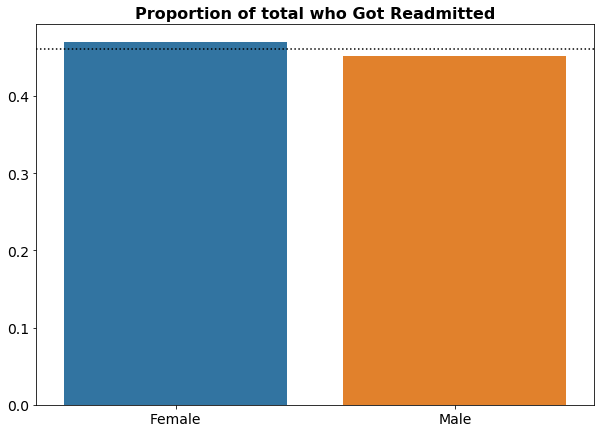

In [120]:
mean_readmitted = g_df['readmitted'].mean()
fig, ax1 = plt.subplots(figsize=(10, 7))
sns.barplot(x=agg_gender.index, y=agg_gender.readmitted, ax=ax1).\
set_title('Proportion of total who Got Readmitted', fontsize=16, fontweight='bold')
ax1.axhline(mean_readmitted, color='k', linestyle=':')
ax1.set(xlabel='', ylabel='')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

<br> <font size="4" color=Black>It shows that the gender male and female both get readmitted almost the same</font> <br/>

<br> <font size="6" color=Red>Considering the Race attribute to check the biasness</font> <br/>

<br> <font size="5" color=Black>Dropping the Unknown Races</font> <br/>

In [121]:
test = test[test.race != "Not Available"]
test = test.reset_index(drop = True)

<br> <font size="5" color=Black>Counting the Readmit value for each race</font> <br/>

In [122]:
test.pivot_table(index='race', columns='readmitted', aggfunc='size')

readmitted,NO,Yes
race,,
African American,10421,8789
Asian,415,226
Caucasian,40383,35716
Hispanic,1183,854
Other,914,591


<br> <font size="5" color=Black>Dropping Note Available and Encoding Race</font> <br/>

In [123]:
r_df = test[['race', 'readmitted']]
labelencoder = LabelEncoder()
r_df.readmitted = labelencoder.fit_transform(r_df.readmitted)

<br> <font size="5" color=Black>Checking the Race Biasness over Readmitted</font> <br/>
<br> <font size="4" color=Black>Shows that how much % each Race readmitted</font> <br/>

In [124]:
agg_race = r_df[['race', 'readmitted']].groupby('race').mean()
agg_race.round(3)

,readmitted
race,
African American,0.458
Asian,0.353
Caucasian,0.469
Hispanic,0.419
Other,0.393


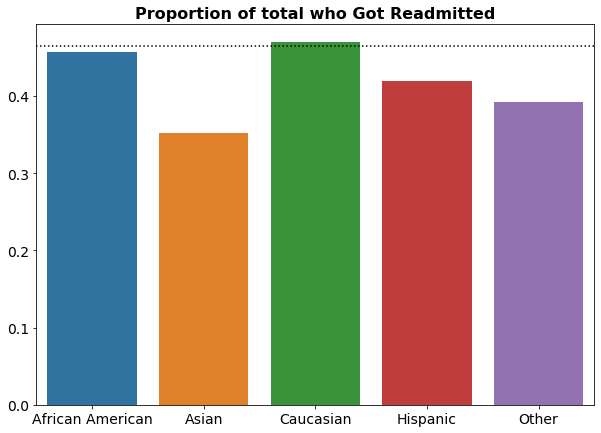

In [125]:
mean_readmitted = r_df['readmitted'].mean()
fig, ax1 = plt.subplots(figsize=(10, 7))
sns.barplot(x=agg_race.index, y=agg_race.readmitted, ax=ax1).\
set_title('Proportion of total who Got Readmitted', fontsize=16, fontweight='bold')
ax1.axhline(mean_readmitted, color='k', linestyle=':')
ax1.set(xlabel='', ylabel='')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

<br> <font size="6" color=Black>Encoding the Values that should be Numeric</font> <br/>

In [126]:
labelencoder = LabelEncoder()
test.num_lab_procedures = labelencoder.fit_transform(test.num_lab_procedures)
test.diag_1 = labelencoder.fit_transform(test.diag_1)
test.diag_2 = labelencoder.fit_transform(test.diag_2)
test.diag_3 = labelencoder.fit_transform(test.diag_3)
test.num_medications = labelencoder.fit_transform(test.num_medications)
test.readmitted = labelencoder.fit_transform(test.readmitted)
test.maximum_weight = labelencoder.fit_transform(test.maximum_weight)
test.number_diagnoses = labelencoder.fit_transform(test.number_diagnoses)
test.time_in_hospital = labelencoder.fit_transform(test.time_in_hospital)

In [127]:
test.race.unique()

array(['Caucasian', 'African American', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

<br> <font size="6" color=Black>Applying Hot Encoder on the Categorical Variables</font> <br/>

In [128]:
df_onehot = pd.concat([test[['maximum_age', 'num_lab_procedures','num_medications','diag_1','diag_2','diag_3','readmitted','maximum_weight','number_diagnoses','time_in_hospital']], pd.get_dummies(test[['race','gender','max_glu_serum','A1Cresult','medical_specialty','metformin', 'repaglinide','nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide','glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide','examide', 'citoglipton', 'insulin', 'glyburide_metformin','glipizide_metformin', 'glimepiride_pioglitazone','metformin_rosiglitazone', 'metformin_pioglitazone', 'change','diabetesMed']])], axis=1)

<br> <font size="6" color=Black>Table</font> <br/>

In [54]:
df_onehot.head(5)

,maximum_age,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,readmitted,maximum_weight,number_diagnoses,time_in_hospital,...,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_pioglitazone_No,metformin_pioglitazone_Steady,change_No,change_Yes,diabetesMed_No,diabetesMed_Yes
0,10,40,0,124,706,744,0,8,0,0,...,0,1,0,1,1,0,1,0,1,0
1,20,58,17,143,78,121,1,8,8,2,...,0,1,0,1,1,0,0,1,0,1
2,30,10,12,454,77,764,0,8,5,1,...,0,1,0,1,1,0,1,0,0,1
3,40,43,15,553,96,248,0,8,6,1,...,0,1,0,1,1,0,0,1,0,1
4,50,50,7,54,24,86,0,8,4,0,...,0,1,0,1,1,0,0,1,0,1


<br> <font size="6" color=Black> Condiering the Asian Race as Protected Attribute becasue it contains Lowest values</font> <br/>

In [55]:
df_aif = BinaryLabelDataset(df=df_onehot, label_names=['readmitted'], protected_attribute_names=['race_Asian'])

<br> <font size="6" color=Black> Dividing Privileged Unprivileged Group</font> <br/>

In [56]:
privileged_group = [{'race_Asian': 0}]
unprivileged_group = [{'race_Asian': 1}]

<br> <font size="6" color=Black>Dividing data into Train, Test and Validation</font> <br/>

In [57]:
df_orig_trn, df_orig_val, df_orig_tst = df_aif.split([0.5, 0.8], shuffle=True)
print([x.features.shape for x in [df_orig_trn, df_orig_val, df_orig_tst]])

[(49746, 171), (29847, 171), (19899, 171)]


<br> <font size="6" color=Black>Functions</font> <br/>

In [58]:
def get_disparity_index(di):
    return 1 - np.minimum(di, 1 / di)


def get_bal_acc(classified_metric):
    return 0.5 * (classified_metric.true_positive_rate() + classified_metric.true_negative_rate())


def train_lr_model(dataset):
    scale = StandardScaler().fit(dataset.features)
    model = LogisticRegression(random_state=0, solver='liblinear')
    x_train = scale.transform(dataset.features)
    y_train = dataset.labels.ravel()
    model.fit(x_train, y_train, sample_weight=dataset.instance_weights)
    y_train_pred = model.predict(x_train)
    return model, scale


def test_lr_model(y_data_pred_prob, dataset, thresh_arr):
    y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)
    dataset_pred = dataset.copy()
    dataset_pred.labels = y_pred
    classified_metric = ClassificationMetric(dataset, dataset_pred, unprivileged_group, privileged_group)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred, unprivileged_group, privileged_group)
    return dataset_pred.labels, classified_metric, metric_pred


def get_y_pred_prob_lr(scale, model, dataset):
    x = scale.transform(dataset.features)
    y_pred_prob = model.predict_proba(x)
    return y_pred_prob


def get_best_bal_acc_cutoff(y_pred_prob, dataset):
    y_validate_pred_prob = y_pred_prob
    bal_acc_arr = []
    disp_imp_arr = []
    for thresh in tqdm(thresh_arr):
        y_validate_pred = (y_validate_pred_prob[:,1] > thresh).astype(np.double)
        dataset_pred = dataset.copy()
        dataset_pred.labels = y_validate_pred

        # Calculate accuracy for each threshold value
        classified_metric = ClassificationMetric(dataset, dataset_pred, unprivileged_group, privileged_group)
        bal_acc = get_bal_acc(classified_metric)
        bal_acc_arr.append(bal_acc)

        # Calculate fairness for each threshold value
        metric_pred = BinaryLabelDatasetMetric(dataset_pred, unprivileged_group, privileged_group)
        disp_imp_arr.append(metric_pred.disparate_impact())

    # Find threshold for best accuracy
    thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
    thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

    # Calculate accuracy and fairness at this threshold
    best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
    disp_imp_at_best_bal_acc = disp_imp_arr[thresh_arr_best_ind]

    # Output metrics
    acc_metrics = pd.DataFrame({'thresh_arr_best_ind' : thresh_arr_best_ind, \
    'thresh_arr_best' : thresh_arr_best, \
    'best_bal_acc' : best_bal_acc, \
    'disp_imp_at_best_bal_acc' : disp_imp_at_best_bal_acc}, index=[0]).transpose()
    return acc_metrics, bal_acc_arr, disp_imp_arr, dataset_pred.labels


def plot_acc_vs_fairness(metric, metric_name, bal_acc_arr, thresh_arr_best_ind):
    fig, ax1 = plt.subplots(figsize=(10, 7))
    ax1.plot(thresh_arr, bal_acc_arr, color='b')
    ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14, labelcolor='b')
    ax2 = ax1.twinx()
    ax2.plot(thresh_arr, metric, color='r')
    ax2.set_ylabel(metric_name, color='r', fontsize=16, fontweight='bold')
    ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
    ax2.yaxis.set_tick_params(labelsize=14, labelcolor='r')
    ax2.grid(True)

<br> <font size="6" color=Black>aif360 Fairness Metrics Disparate Impact</font> <br/>

In [59]:
metric_orig_trn = BinaryLabelDatasetMetric(df_orig_trn, unprivileged_group, privileged_group)
print('1-min(DI, 1/DI):', get_disparity_index(metric_orig_trn.disparate_impact()).round(3))

1-min(DI, 1/DI): 0.28


<br> <font size="6" color=Black>Training the Model using Training Data</font> <br/>

In [60]:
lr_orig, lr_scale_orig = train_lr_model(df_orig_trn)
## getting the scaled data and model (Logistics Regressions)

<br> <font size="6" color=Black>Generating in array</font> <br/>

In [61]:
thresh_arr = np.linspace(0.01, 0.5, 100)

<br> <font size="6" color=Black>Passing the Vailataion Data</font> <br/>

In [62]:
y_validate_pred_prob_orig = get_y_pred_prob_lr(scale=lr_scale_orig, model=lr_orig, dataset=df_orig_val)

<br> <font size="6" color=Black>Getting Balance Accurecy</font> <br/>

In [63]:
acc_metrics_orig, bal_acc_arr_orig, disp_imp_arr_orig, dataset_pred_labels_orig = get_best_bal_acc_cutoff(y_pred_prob=y_validate_pred_prob_orig, dataset=df_orig_val)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.73it/s]


In [64]:
print('Threshold corresponding to best balanced accuracy:', acc_metrics_orig.loc['thresh_arr_best', 0].round(3))
print('Best balanced accuracy:', acc_metrics_orig.loc['best_bal_acc', 0].round(3))
print('1-min(DI, 1/DI):', get_disparity_index(acc_metrics_orig.loc['disp_imp_at_best_bal_acc', 0]).round(3))

Threshold corresponding to best balanced accuracy: 0.465
Best balanced accuracy: 0.569
1-min(DI, 1/DI): 0.868


<br> <font size="6" color=Black> Plot accuracy and fairness metrics over a range of classification thresholds</font> <br/>

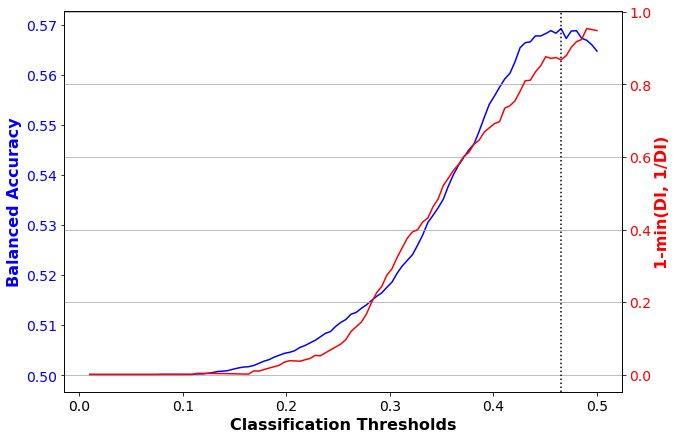

In [65]:
plot_acc_vs_fairness(get_disparity_index(np.array(disp_imp_arr_orig)), \
  '1-min(DI, 1/DI)', bal_acc_arr_orig, \
  acc_metrics_orig.loc['thresh_arr_best_ind', 0].astype(int))

<br> <font size="6" color=Black> Test model on original dataset</font> <br/>

In [66]:
y_test_pred_prob_orig = get_y_pred_prob_lr(scale=lr_scale_orig, model=lr_orig, dataset=df_orig_tst)
dataset_pred_labels_orig, classified_metric_orig, metric_pred_orig = test_lr_model(y_data_pred_prob=y_test_pred_prob_orig, dataset=df_orig_tst,thresh_arr=acc_metrics_orig.loc['thresh_arr_best', 0])

In [67]:
print('Threshold corresponding to best balanced accuracy:', acc_metrics_orig.loc['thresh_arr_best', 0].round(3))
print('Best balanced accuracy:', get_bal_acc(classified_metric_orig).round(3))
print('1-min(DI, 1/DI):', get_disparity_index(metric_pred_orig.disparate_impact()).round(3))

Threshold corresponding to best balanced accuracy: 0.465
Best balanced accuracy: 0.568
1-min(DI, 1/DI): 0.934


<br> <center> <font size="7" color=Black> Bias Mitigation</font></center> <br/>

In [68]:
RW = Reweighing(unprivileged_group, privileged_group)
df_transf_trn = RW.fit_transform(df_orig_trn)

<br> <font size="6" color=Black> Compute fairness metric on transformed dataset </font> <br/>

In [69]:
metric_transf_trn = BinaryLabelDatasetMetric(df_transf_trn, unprivileged_group, privileged_group)
print('1-min(DI, 1/DI):', get_disparity_index(metric_transf_trn.disparate_impact()).round(3))

1-min(DI, 1/DI): 0.0


<br> <font size="6" color=Black> Train model on transformed dataset</font> <br/>

In [70]:
lr_transf, lr_scale_transf = train_lr_model(df_transf_trn)

In [71]:
y_validate_pred_prob_transf = get_y_pred_prob_lr(scale=lr_scale_transf, model=lr_transf, dataset=df_orig_val)

In [72]:
acc_metrics_transf, bal_acc_arr_transf, disp_imp_arr_transf, dataset_pred_labels_transf = \
get_best_bal_acc_cutoff(y_pred_prob=y_validate_pred_prob_transf, dataset=df_orig_val)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 33.57it/s]


In [73]:
print('Threshold corresponding to best balanced accuracy:', acc_metrics_transf.loc['thresh_arr_best', 0].round(3))
print('Best balanced accuracy:', acc_metrics_transf.loc['best_bal_acc', 0].round(3))
print('1-min(DI, 1/DI):', get_disparity_index(acc_metrics_transf.loc['disp_imp_at_best_bal_acc', 0]).round(3))

Threshold corresponding to best balanced accuracy: 0.48
Best balanced accuracy: 0.569
1-min(DI, 1/DI): 0.003


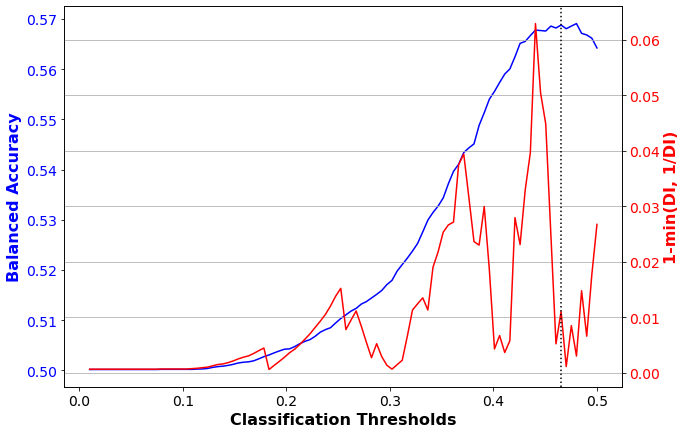

In [74]:
plot_acc_vs_fairness(get_disparity_index(np.array(disp_imp_arr_transf)), \
  '1-min(DI, 1/DI)', bal_acc_arr_transf, \
  acc_metrics_orig.loc['thresh_arr_best_ind', 0].astype(int))

<br> <font size="6" color=Black> Test model on transformed dataset </font> <br/>

In [75]:
y_test_pred_prob_transf = get_y_pred_prob_lr(scale=lr_scale_transf, model=lr_transf, dataset=df_orig_tst)

dataset_pred_labels_transf, classified_metric_transf, metric_pred_transf = test_lr_model(\
  y_data_pred_prob=y_test_pred_prob_transf, dataset=df_orig_tst,\
  thresh_arr=acc_metrics_transf.loc['thresh_arr_best', 0])

In [76]:
print('Threshold corresponding to best balanced accuracy:', acc_metrics_transf.loc['thresh_arr_best', 0].round(3))
print('Best balanced accuracy:', get_bal_acc(classified_metric_transf).round(3))
print('1-min(DI, 1/DI):', get_disparity_index(metric_pred_transf.disparate_impact()).round(3))

Threshold corresponding to best balanced accuracy: 0.48
Best balanced accuracy: 0.566
1-min(DI, 1/DI): 0.013
